### simplification

In [1]:
from sympy import*


#### Before init_printing()

In [2]:
x,y,z=symbols('x y z')
sqrt(Integral(1/x))

sqrt(Integral(1/x, x))

In [3]:
Integral(1/x)

Integral(1/x, x)

#### After init_printing()

In [4]:
init_printing()

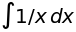

In [5]:
Integral(1/x)

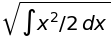

In [6]:
sqrt(Integral(x**2/2))

In [7]:
pprint(Derivative(1/x))

d ⎛1⎞
──⎜─⎟
dx⎝x⎠


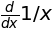

In [8]:
Derivative(1/x)

### simplify
- most useful features of a symbolic manipulation system is the ability to simplify mathematical expressions. 
- SymPy has dozens of functions to perform various kinds of simplification. 
- There is also one general function called simplify() that attempts to apply all of these functions in an intelligent way to arrive at the simplest form of an expression.

- simplify() is capable of handling a large class of expressions.

In [9]:
ex=(x**2)+(2*x)+2
simplify(ex)

In [10]:
ex1=(x**2)-(2*x)+4
simplify(ex+ex1)

In [11]:
simplify(ex-ex1)

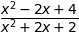

In [12]:
simplify(ex1/ex)

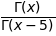

In [13]:
simplify(gamma(x)/gamma(x-5))

- simplify() has a pitfall. It just applies all the major simplification operations in SymPy, and uses heuristics to determine the simplest result. But “simplest” is not a well-defined term. For example, say we wanted to “simplify” x**2+2*x+1 into (x+1)**2:

In [14]:
simplify(x**2+2*x+1)

#### factor()
- There is a function to perform this simplification, called factor()

In [15]:
factor(x**2+2*x+1)

In [16]:
factor(2*x**3+4*y**2+2*z**1+10)

In [17]:
simplify((x+1)**2)

In [18]:
factor(4*x**2+8*x+4)

In [19]:
factor(x**2-2*x+1)

In [20]:
expand(4*(x-1)**2)

- Another pitfall to simplify() is that it can be unnecessarily slow, since it tries many kinds of simplifications before picking the best one.<br><br>

- Applying specific simplification functions instead of simplify() also has the advantage that specific functions have certain guarantees about the form of their output

### Polynomial/Rational Function Simplification

#### expand
- expand() is one of the most common simplification functions in SymPy. Although it has a lot of scopes, for now, we will consider its function in expanding polynomial expressions.<br><br>

- expand() will put it into a canonical form of a sum of monomials.

In [21]:
expand((x+1)*2)

In [22]:
expand((x+1)**3)

In [23]:
factor(x**3+3*x**2+3*x+1)

In [24]:
expand((x+1)**6)

In [25]:
expand(x**2+4*y+2*z)

- expand() may not sound like a simplification function. 
- After all, by its very name, it makes expressions bigger, not smaller. 
- Usually this is the case, but often an expression will become smaller upon calling expand() on it due to cancellation.

In [26]:
expand((x+1)**2-(x**2+2*x+1))

In [27]:
expand((x+1)**2-(x-1)**2)

#### factor

- factor() takes a polynomial and factors it into irreducible factors over the rational numbers

In [28]:
factor(x**2+2*x+1)

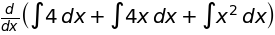

In [29]:
factor(Derivative(Integral(x**2+4*x+4)))

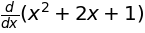

In [30]:
factor(Derivative(x**2+2*x+1))

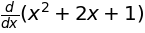

In [31]:
factor(Derivative((x+1)**2))

In [32]:
factor((x+1)**2-(x**2+2*x+2))

- polynomials, factor() is the opposite of expand()
- actor() uses a complete multivariate factorization algorithm over the rational numbers, which means that each of the factors returned by factor() is guaranteed to be irreducible.
- If you are interested in the factors themselves, factor_list returns a more structured output.

In [33]:
factor_list(2**x*y+4*y*z+5+12*z)

In [34]:
factor_list(sin(x)+cos(y)**2)

In [35]:
factor((cos(x)**2+sin(x)**2))

In [36]:
simplify((cos(x)**2+sin(x)**2))

In [37]:
factor(sin(x)**2+2*sin(x)*cos(x)+cos(x)**2)

### collect
- collect() collects common powers of a term in an expression

- 

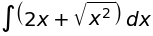

In [38]:
e=Integral(sqrt((x**2))+2*x)
coll=collect(e,x)
coll

In [39]:
coll.coeff(x,3)

In [40]:
ex=x*y + x - 3 + 2*x**2 - z*x**2 + x**3
co=collect(ex,x)
co

In [41]:
ex

- collect() is particularly useful in conjunction with the .coeff() method. expr.coeff(x, n) gives the coefficient of x**n in expr

- .coeff() is usefull to find coefficient of the values

In [42]:
co.coeff(x,2)

In [43]:
co.coeff(x,1)

In [44]:
co.coeff(x,3)

In [45]:
co.coeff(x,5)

### cancel
- cancel() will take any rational function and put it into the standard canonical form, pq, where p and q are expanded polynomials with no common factors, and the leading coefficients of p and q do not have denominators 

In [46]:
cancel((x**2+2*x+1)/(x**2+x))

In [47]:
factor((x**2+2*x+1)/(x**2+x))

In [48]:
expre=(x**2+2*x+1)/(x**2+x)
cancel(expre)

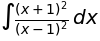

In [49]:
e=Integral((x+1)**2/(x-1)**2)
factor(e)

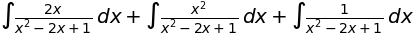

In [50]:
expand(e)

- factor() will completely factorize both the numerator and the denominator of an expression <br><br>
..see below

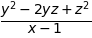

In [51]:
cancel((x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1))

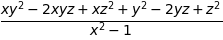

In [52]:
ex=(x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
ex

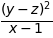

In [53]:
factor((x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1))

#### cancel() is more effect than factor()

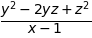

In [54]:
simplify((x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1))

### apart
- apart() performs a partial fraction decomposition on a rational function.


- apart() can only one type of symbol

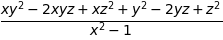

In [59]:
ex

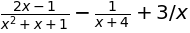

In [61]:
apart((4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x))

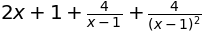

In [63]:
apart(((x**2+2*x+1)/(x**2-2*x+1)+2*x))

### Trigonometric Simplification
- SymPy follows Python’s naming conventions for inverse trigonometric functions, which is to append an a to the front of the function’s name. For example, the inverse cosine, or arc cosine, is called acos().

In [64]:
cos(x)

In [66]:
cos(acos(1))

In [67]:
cos(90)

In [69]:
asin(1)

In [70]:
atan(1/2)

In [71]:
atan(1)

In [72]:
acot(0)

In [74]:
acot(-oo)

### trigsimp
- To simplify expressions using trigonometric identities, use trigsimp().
- like simplify(), trigsimp() applies various trigonometric identities to the input expression, and then uses a heuristic to return the “best” one.

In [76]:
trigsimp(sin(x)**2+cos(x)**2)

In [77]:
trigsimp(sin(x)**2-cos(x)**2)

In [78]:
trigsimp(sin(x)**2+2*sin(x)*cos(x)+cos(x)**2)

In [79]:
trigsimp(cosh(x)**2+sinh(x)**2)

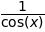

In [81]:
trigsimp(tan(x)/sin(x))

### expand_trig
- To expand trigonometric functions, that is, apply the sum or double angle identities, use expand_trig()

-  expand_trig() tends to make trigonometric expressions larger, and trigsimp() tends to make them smaller, these identities can be applied in reverse using trigsimp()

In [83]:
expand_trig(cos(x)*sin(x)+sin(x)*cos(x))

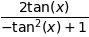

In [84]:
expand_trig(tan(2*x))

In [85]:
expand_trig(2*tan(x))

In [87]:
ex=sin(x)*cos(y)+cos(x)*sin(y)
pprint(expand_trig(ex))
pprint(trigsimp(ex))

sin(x)⋅cos(y) + sin(y)⋅cos(x)
sin(x + y)


### powers
1. x^a+x^b=x^(a+b)

2. x^a*y^a=(x*y)^a

3. (x^a)^b=x^(a*b)


Identity 1 is always true.

Identity 2 is not always true

- SymPy will not perform simplifications if they are not true in general.
- In order to make SymPy perform simplifications involving identities that are only true under certain assumptions, we need to put assumptions on our Symbols.

By default, SymPy Symbols are assumed to be complex (elements of C). That is, a simplification will not be applied to an expression with a given Symbol unless it holds for all complex numbers.

Symbols can be given different assumptions by passing the assumption to symbols(). For the rest of this section, we will be assuming that x and y are positive, and that a and b are real. We will leave z, t, and c as arbitrary complex Symbols to demonstrate what happens in that case.

In [90]:
x,y=symbols('x y',positive=True)
u,v=symbols('u v',real=True)
a,b=symbols('a b')
sqrt(x)==x**Rational(1,2)

True

In [91]:
sqrt(x)

In [92]:
x**Rational(1,4)

### powsimp

In [93]:
powsimp((x**2)**Rational(1,4))

In [95]:
powsimp(x**a*y**a)

In [97]:
powsimp(x**2*y**2)

In [99]:
powsimp(x**2*y**2)

In [102]:
powsimp((sqrt(x))*(sqrt(y)))

In [101]:
powsimp(sqrt(x)*sqrt(y),force=True)

### expand_power_exp / expand_power_base